# Merging Emmys Data with Metacritic Scores

The 74th Primetime Emmy Awards (Emmys) were held recently, which gave awards to the best TV shows, directors, actors, etc. For the awards for the best television series, there are two categories:
- Outstanding Drama Series
- Outstanding Comedy Series

For these awards, I wanted to see how the winners chosen by the Academy of Television Arts & Sciences (ATAS) compared to what the critics and audiences thought of those shows. To do this, I used scores from Metacritic, a website that aggregates review of TV shows. To get the data about the Emmy winners and nominess, I used Wikipedia.

## Setup

First I need to import the appropriate libraries. This is a pretty simple dataset so only a couple of them are needed.

In [1]:
import numpy as np
import pandas as pd

## Wikipedia Data

Next I will use Wikipedia to get the data for each award. Below is an example of what this page looks like. Wikipedia puts the winner at the top of each year.

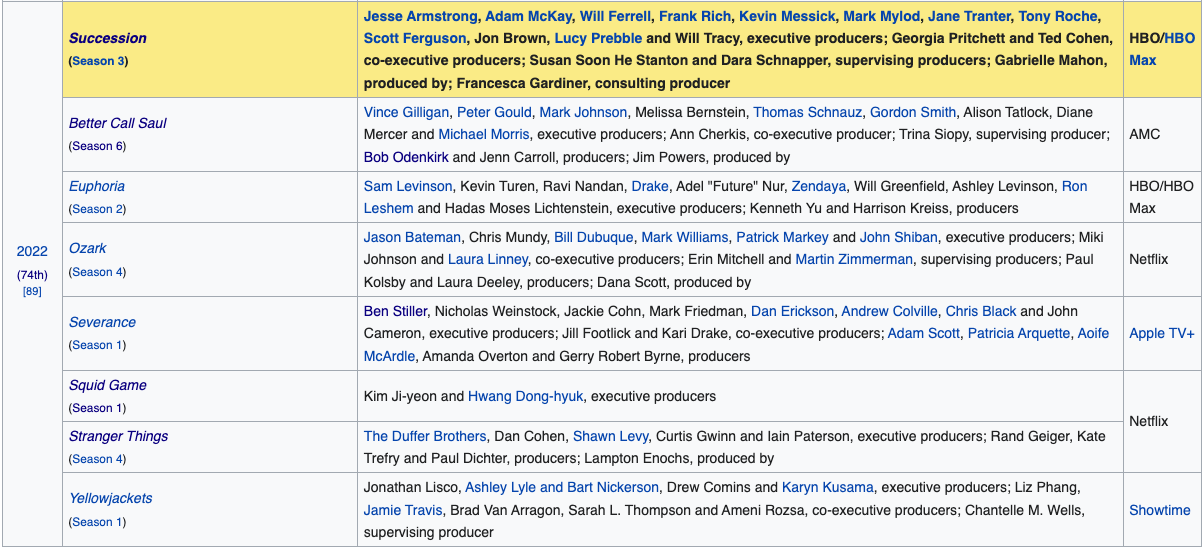

### Outstanding Drama Series

In [2]:
emmy_drama = pd.read_html("https://en.wikipedia.org/wiki/Primetime_Emmy_Award_for_Outstanding_Drama_Series")
drama_2000s = emmy_drama[6]
drama_2010s = emmy_drama[7]
drama_2020s = emmy_drama[8]

drama_2000s['Year'] = drama_2000s['Year'].str[:4]
drama_2000s['Program'] = drama_2000s['Program'].str.replace('(',': ')
drama_2000s['Program'] = drama_2000s['Program'].str.replace(')','')
drama_2000s = drama_2000s.drop(['Producers'], axis = 1)
drama_2000s = drama_2000s.dropna()

drama_2010s['Year'] = drama_2010s['Year'].str[:4]
drama_2010s['Program'] = drama_2010s['Program'].str.replace('(',': ')
drama_2010s['Program'] = drama_2010s['Program'].str.replace(')','')
drama_2010s = drama_2010s.drop(['Producers'], axis = 1)
drama_2010s = drama_2010s.dropna()

drama_2020s['Year'] = drama_2020s['Year'].str[:4]
drama_2020s['Program'] = drama_2020s['Program'].str.replace('(',': ')
drama_2020s['Program'] = drama_2020s['Program'].str.replace(')','')
drama_2020s = drama_2020s.drop(['Producers'], axis = 1)
drama_2020s = drama_2020s.dropna()

drama = pd.concat([drama_2000s, drama_2010s, drama_2020s])
drama['Category'] = 'Outstanding Drama Series' 
drama['Match'] = drama.Year.eq(drama.Year.shift())
drama['Award'] = np.where(drama['Match'] == False, 'Winner', 'Nominee')
drama = drama.drop(['Match'], axis = 1)
drama

,Year,Program,Network,Category,Award
1,2000,The West Wing: Season 1,NBC,Outstanding Drama Series,Winner
2,2000,ER: Season 6,NBC,Outstanding Drama Series,Nominee
3,2000,Law & Order: Season 10,NBC,Outstanding Drama Series,Nominee
4,2000,The Practice: Season 4,ABC,Outstanding Drama Series,Nominee
5,2000,The Sopranos: Season 2,HBO,Outstanding Drama Series,Nominee
...,...,...,...,...,...
22,2022,Ozark: Season 4,Netflix,Outstanding Drama Series,Nominee
23,2022,Severance: Season 1,Apple TV+,Outstanding Drama Series,Nominee
24,2022,Squid Game: Season 1,Netflix,Outstanding Drama Series,Nominee
25,2022,Stranger Things: Season 4,Netflix,Outstanding Drama Series,Nominee


### Outstanding Comedy Series

In [3]:
emmy_comedy = pd.read_html("https://en.wikipedia.org/wiki/Primetime_Emmy_Award_for_Outstanding_Comedy_Series")
comedy_2000s = emmy_comedy[6]
comedy_2010s = emmy_comedy[7]
comedy_2020s = emmy_comedy[8]

comedy_2000s['Year'] = comedy_2000s['Year'].str[:4]
comedy_2000s['Program'] = comedy_2000s['Program'].str.replace('(',': ')
comedy_2000s['Program'] = comedy_2000s['Program'].str.replace(')','')
comedy_2000s = comedy_2000s.drop(['Producers'], axis = 1)
comedy_2000s = comedy_2000s.dropna()

comedy_2010s['Year'] = comedy_2010s['Year'].str[:4]
comedy_2010s['Program'] = comedy_2010s['Program'].str.replace('(',': ')
comedy_2010s['Program'] = comedy_2010s['Program'].str.replace(')','')
comedy_2010s = comedy_2010s.drop(['Producers'], axis = 1)
comedy_2010s = comedy_2010s.dropna()

comedy_2020s['Year'] = comedy_2020s['Year'].str[:4]
comedy_2020s['Program'] = comedy_2020s['Program'].str.replace('(',': ')
comedy_2020s['Program'] = comedy_2020s['Program'].str.replace(')','')
comedy_2020s = comedy_2020s.drop(['Producers'], axis = 1)
comedy_2020s = comedy_2020s.dropna()

comedy = pd.concat([comedy_2000s, comedy_2010s, comedy_2020s])
comedy['Category'] = 'Outstanding Comedy Series' 
comedy['Match'] = comedy.Year.eq(comedy.Year.shift())
comedy['Award'] = np.where(comedy['Match'] == False, 'Winner', 'Nominee')
comedy = comedy.drop(['Match'], axis = 1)
comedy

,Year,Program,Network,Category,Award
1,2000,Will & Grace: Season 2,NBC,Outstanding Comedy Series,Winner
2,2000,Everybody Loves Raymond: Season 4,CBS,Outstanding Comedy Series,Nominee
3,2000,Frasier: Season 7,NBC,Outstanding Comedy Series,Nominee
4,2000,Friends: Season 6,NBC,Outstanding Comedy Series,Nominee
5,2000,Sex and the City: Season 2,HBO,Outstanding Comedy Series,Nominee
...,...,...,...,...,...
22,2022,Curb Your Enthusiasm: Season 11,HBO,Outstanding Comedy Series,Nominee
23,2022,Hacks: Season 2,HBO Max,Outstanding Comedy Series,Nominee
24,2022,The Marvelous Mrs. Maisel: Season 4,Prime Video,Outstanding Comedy Series,Nominee
25,2022,Only Murders in the Building: Season 1,Hulu,Outstanding Comedy Series,Nominee


### Concatenating the Dataframes

I'm only looking at these two awards, and since the column headers and datatypes are the same, I will concatenate these two dataframes:

In [4]:
emmys = pd.concat([drama, comedy])
emmys = emmys.sort_values(by = ['Year','Category','Award', 'Program'], ascending = [True, True, False, True])
emmys

,Year,Program,Network,Category,Award
1,2000,Will & Grace: Season 2,NBC,Outstanding Comedy Series,Winner
2,2000,Everybody Loves Raymond: Season 4,CBS,Outstanding Comedy Series,Nominee
3,2000,Frasier: Season 7,NBC,Outstanding Comedy Series,Nominee
4,2000,Friends: Season 6,NBC,Outstanding Comedy Series,Nominee
5,2000,Sex and the City: Season 2,HBO,Outstanding Comedy Series,Nominee
...,...,...,...,...,...
22,2022,Ozark: Season 4,Netflix,Outstanding Drama Series,Nominee
23,2022,Severance: Season 1,Apple TV+,Outstanding Drama Series,Nominee
24,2022,Squid Game: Season 1,Netflix,Outstanding Drama Series,Nominee
25,2022,Stranger Things: Season 4,Netflix,Outstanding Drama Series,Nominee


### Minor adjustments

Here I make some minor adjustments:
- Changing the "Year" column from object to integer.
- Removing the citations from the titles. Admittedly, I didn't know how to proactively fix this, so I just fixed it retroactively.

In [5]:
emmys['Year'] = pd.to_numeric(emmys['Year'])
emmys.dtypes

Year         int64
Program     object
Network     object
Category    object
Award       object
dtype: object

In [6]:
emmys = emmys.replace({'Program':{'The Sopranos: Season 6 [B]':'The Sopranos: Season 6',
                                  'Breaking Bad: Season 5[C]':'Breaking Bad: Season 5',
                                  'Mad Men: Season 7[D]':'Mad Men: Season 7'}})

In [7]:
emmys_test = emmys[(emmys['Program'] == 'The Sopranos: Season 6') |
                   (emmys['Program'] == 'Breaking Bad: Season 5') |
                   (emmys['Program'] == 'Mad Men: Season 7')]
emmys_test

,Year,Program,Network,Category,Award
40,2006,The Sopranos: Season 6,HBO,Outstanding Drama Series,Nominee
43,2007,The Sopranos: Season 6,HBO,Outstanding Drama Series,Winner
22,2013,Breaking Bad: Season 5,AMC,Outstanding Drama Series,Winner
29,2014,Breaking Bad: Season 5,AMC,Outstanding Drama Series,Winner
33,2014,Mad Men: Season 7,AMC,Outstanding Drama Series,Nominee
41,2015,Mad Men: Season 7,AMC,Outstanding Drama Series,Nominee


## Metacritic Scores

Now I will bring in the Metacritic scores using a CSV file I found on [Kaggle](https://www.kaggle.com/datasets/jithinanievarghese/tv-shows-of-all-time-metacritic-and-user-scores). This dataset provides the Metacritic scores (both critics and users) of all TV shows from 1977 - 2022.

In [8]:
meta = pd.read_csv('all_time_tv_shows_metacritic.csv')
meta.head()

,title,rank,summary,meta_score,user_score,release_date,link,critics_reviews_link,user_reviews_link,listing_url
0,Rectify: Season 4,1,Daniel tries to start a new life outside of Pa...,99,8.7,"October 26, 2016",https://www.metacritic.com/tv/rectify/season-4,https://www.metacritic.com/tv/rectify/season-4...,https://www.metacritic.com/tv/rectify/season-4...,https://www.metacritic.com/browse/tv/score/met...
1,The Larry Sanders Show: Season 4,2,Comic Garry Shandling draws upon his own talk ...,99,5.8,"July 19, 1995",https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/browse/tv/score/met...
2,Murder One: Season 1,3,One of several crime and law dramas created by...,99,6.4,"September 19, 1995",https://www.metacritic.com/tv/murder-one/season-1,https://www.metacritic.com/tv/murder-one/seaso...,https://www.metacritic.com/tv/murder-one/seaso...,https://www.metacritic.com/browse/tv/score/met...
3,The Larry Sanders Show: Season 6,4,Comic Garry Shandling draws upon his own talk ...,99,5.5,"March 15, 1998",https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/browse/tv/score/met...
4,Breaking Bad: Season 5,5,The final season for the award-winning drama b...,99,9.6,"July 15, 2012",https://www.metacritic.com/tv/breaking-bad/sea...,https://www.metacritic.com/tv/breaking-bad/sea...,https://www.metacritic.com/tv/breaking-bad/sea...,https://www.metacritic.com/browse/tv/score/met...


I don't need the "rank" or "summary" columns, so I'll just drop them from this dataframe.

In [9]:
meta = meta.drop(['rank', 'summary'], axis = 1)
meta.head()

,title,meta_score,user_score,release_date,link,critics_reviews_link,user_reviews_link,listing_url
0,Rectify: Season 4,99,8.7,"October 26, 2016",https://www.metacritic.com/tv/rectify/season-4,https://www.metacritic.com/tv/rectify/season-4...,https://www.metacritic.com/tv/rectify/season-4...,https://www.metacritic.com/browse/tv/score/met...
1,The Larry Sanders Show: Season 4,99,5.8,"July 19, 1995",https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/browse/tv/score/met...
2,Murder One: Season 1,99,6.4,"September 19, 1995",https://www.metacritic.com/tv/murder-one/season-1,https://www.metacritic.com/tv/murder-one/seaso...,https://www.metacritic.com/tv/murder-one/seaso...,https://www.metacritic.com/browse/tv/score/met...
3,The Larry Sanders Show: Season 6,99,5.5,"March 15, 1998",https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/tv/the-larry-sander...,https://www.metacritic.com/browse/tv/score/met...
4,Breaking Bad: Season 5,99,9.6,"July 15, 2012",https://www.metacritic.com/tv/breaking-bad/sea...,https://www.metacritic.com/tv/breaking-bad/sea...,https://www.metacritic.com/tv/breaking-bad/sea...,https://www.metacritic.com/browse/tv/score/met...


## Merging Wikipedia and Metacritic Data

Since I formatted the "Program" column in the Wikipedia dataframe to read as "[TV Show]: [Season #]," I can merge this dataframe with the Metacritic dataframe because they both follow the same naming convention.

In [10]:
emmy_meta = pd.merge(emmys, meta, how = 'left', left_on = 'Program', right_on = 'title')
emmy_meta = emmy_meta.drop(['title'], axis = 1)
emmy_meta

,Year,Program,Network,Category,Award,meta_score,user_score,release_date,link,critics_reviews_link,user_reviews_link,listing_url
0,2000,Will & Grace: Season 2,NBC,Outstanding Comedy Series,Winner,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Everybody Loves Raymond: Season 4,CBS,Outstanding Comedy Series,Nominee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Frasier: Season 7,NBC,Outstanding Comedy Series,Nominee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Friends: Season 6,NBC,Outstanding Comedy Series,Nominee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,Sex and the City: Season 2,HBO,Outstanding Comedy Series,Nominee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
280,2022,Ozark: Season 4,Netflix,Outstanding Drama Series,Nominee,78.0,8.1,"January 21, 2022",https://www.metacritic.com/tv/ozark/season-4,https://www.metacritic.com/tv/ozark/season-4/c...,https://www.metacritic.com/tv/ozark/season-4/u...,https://www.metacritic.com/browse/tv/score/met...
281,2022,Severance: Season 1,Apple TV+,Outstanding Drama Series,Nominee,83.0,8.5,"February 18, 2022",https://www.metacritic.com/tv/severance/season-1,https://www.metacritic.com/tv/severance/season...,https://www.metacritic.com/tv/severance/season...,https://www.metacritic.com/browse/tv/score/met...
282,2022,Squid Game: Season 1,Netflix,Outstanding Drama Series,Nominee,69.0,6.8,"September 17, 2021",https://www.metacritic.com/tv/squid-game/season-1,https://www.metacritic.com/tv/squid-game/seaso...,https://www.metacritic.com/tv/squid-game/seaso...,https://www.metacritic.com/browse/tv/score/met...
283,2022,Stranger Things: Season 4,Netflix,Outstanding Drama Series,Nominee,69.0,7.7,"May 27, 2022",https://www.metacritic.com/tv/stranger-things/...,https://www.metacritic.com/tv/stranger-things/...,https://www.metacritic.com/tv/stranger-things/...,https://www.metacritic.com/browse/tv/score/met...


Before making changes to this dataframe, I need to keep a copy with the null values for later, so I'll make a copy of this dataframe with the nulls and drop the nulls from the original dataframe:

In [11]:
emmy_meta_nulls = emmy_meta

In [12]:
emmy_meta = emmy_meta.dropna()

Since the goal is to make scatter plots in Tableau, it's best if both axis have the same values. To make sure of this, I'll need to change either the critics score or the user score. I'll just change the "user_score" to pretend users rated these shows out of 100 instead of just 10:

Admittedly, I didn't know how to proactively change "tbd" to a number, so I changed it reactively.

In [13]:
emmy_meta = emmy_meta.replace({'user_score':{'tbd':0}})

In [14]:
emmy_meta['meta_score'] = pd.to_numeric(emmy_meta['meta_score'])
emmy_meta['user_score'] = pd.to_numeric(emmy_meta['user_score'])
emmy_meta.dtypes

Year                      int64
Program                  object
Network                  object
Category                 object
Award                    object
meta_score              float64
user_score              float64
release_date             object
link                     object
critics_reviews_link     object
user_reviews_link        object
listing_url              object
dtype: object

In [15]:
emmy_meta['user_score_actual'] = emmy_meta['user_score']

column_to_move = emmy_meta.pop("user_score_actual")
emmy_meta.insert(7, "user_score_actual", column_to_move)

emmy_meta['user_score'] = emmy_meta['user_score'] * 10

emmy_meta.head()

,Year,Program,Network,Category,Award,meta_score,user_score,user_score_actual,release_date,link,critics_reviews_link,user_reviews_link,listing_url
5,2000,The West Wing: Season 1,NBC,Outstanding Drama Series,Winner,79.0,81.0,8.1,"September 22, 1999",https://www.metacritic.com/tv/the-west-wing/se...,https://www.metacritic.com/tv/the-west-wing/se...,https://www.metacritic.com/tv/the-west-wing/se...,https://www.metacritic.com/browse/tv/score/met...
9,2000,The Sopranos: Season 2,HBO,Outstanding Drama Series,Nominee,97.0,93.0,9.3,"January 16, 2000",https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/browse/tv/score/met...
19,2001,The Sopranos: Season 3,HBO,Outstanding Drama Series,Nominee,97.0,94.0,9.4,"March 4, 2001",https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/browse/tv/score/met...
26,2002,24: Season 1,Fox,Outstanding Drama Series,Nominee,88.0,88.0,8.8,"November 6, 2001",https://www.metacritic.com/tv/24/season-1,https://www.metacritic.com/tv/24/season-1/crit...,https://www.metacritic.com/tv/24/season-1/user...,https://www.metacritic.com/browse/tv/score/met...
31,2003,Curb Your Enthusiasm: Season 3,HBO,Outstanding Comedy Series,Nominee,93.0,88.0,8.8,"September 15, 2002",https://www.metacritic.com/tv/curb-your-enthus...,https://www.metacritic.com/tv/curb-your-enthus...,https://www.metacritic.com/tv/curb-your-enthus...,https://www.metacritic.com/browse/tv/score/met...


I want the "Program" column to be split into two columns, one for the title of the show, and one for the season:

In [16]:
emmy_meta[['Title','Season']] = emmy_meta.Program.str.split(": Season", expand = True)
emmy_meta

,Year,Program,Network,Category,Award,meta_score,user_score,user_score_actual,release_date,link,critics_reviews_link,user_reviews_link,listing_url,Title,Season
5,2000,The West Wing: Season 1,NBC,Outstanding Drama Series,Winner,79.0,81.0,8.1,"September 22, 1999",https://www.metacritic.com/tv/the-west-wing/se...,https://www.metacritic.com/tv/the-west-wing/se...,https://www.metacritic.com/tv/the-west-wing/se...,https://www.metacritic.com/browse/tv/score/met...,The West Wing,1
9,2000,The Sopranos: Season 2,HBO,Outstanding Drama Series,Nominee,97.0,93.0,9.3,"January 16, 2000",https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/browse/tv/score/met...,The Sopranos,2
19,2001,The Sopranos: Season 3,HBO,Outstanding Drama Series,Nominee,97.0,94.0,9.4,"March 4, 2001",https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/browse/tv/score/met...,The Sopranos,3
26,2002,24: Season 1,Fox,Outstanding Drama Series,Nominee,88.0,88.0,8.8,"November 6, 2001",https://www.metacritic.com/tv/24/season-1,https://www.metacritic.com/tv/24/season-1/crit...,https://www.metacritic.com/tv/24/season-1/user...,https://www.metacritic.com/browse/tv/score/met...,24,1
31,2003,Curb Your Enthusiasm: Season 3,HBO,Outstanding Comedy Series,Nominee,93.0,88.0,8.8,"September 15, 2002",https://www.metacritic.com/tv/curb-your-enthus...,https://www.metacritic.com/tv/curb-your-enthus...,https://www.metacritic.com/tv/curb-your-enthus...,https://www.metacritic.com/browse/tv/score/met...,Curb Your Enthusiasm,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2022,Ozark: Season 4,Netflix,Outstanding Drama Series,Nominee,78.0,81.0,8.1,"January 21, 2022",https://www.metacritic.com/tv/ozark/season-4,https://www.metacritic.com/tv/ozark/season-4/c...,https://www.metacritic.com/tv/ozark/season-4/u...,https://www.metacritic.com/browse/tv/score/met...,Ozark,4
281,2022,Severance: Season 1,Apple TV+,Outstanding Drama Series,Nominee,83.0,85.0,8.5,"February 18, 2022",https://www.metacritic.com/tv/severance/season-1,https://www.metacritic.com/tv/severance/season...,https://www.metacritic.com/tv/severance/season...,https://www.metacritic.com/browse/tv/score/met...,Severance,1
282,2022,Squid Game: Season 1,Netflix,Outstanding Drama Series,Nominee,69.0,68.0,6.8,"September 17, 2021",https://www.metacritic.com/tv/squid-game/season-1,https://www.metacritic.com/tv/squid-game/seaso...,https://www.metacritic.com/tv/squid-game/seaso...,https://www.metacritic.com/browse/tv/score/met...,Squid Game,1
283,2022,Stranger Things: Season 4,Netflix,Outstanding Drama Series,Nominee,69.0,77.0,7.7,"May 27, 2022",https://www.metacritic.com/tv/stranger-things/...,https://www.metacritic.com/tv/stranger-things/...,https://www.metacritic.com/tv/stranger-things/...,https://www.metacritic.com/browse/tv/score/met...,Stranger Things,4


To make it look better, I'm going to move the new columns I created to the left:

In [17]:
column_to_move = emmy_meta.pop("Title")
emmy_meta.insert(2, "Title", column_to_move)

In [18]:
column_to_move = emmy_meta.pop("Season")
emmy_meta.insert(3, "Season", column_to_move)

In [19]:
emmy_meta.head()

,Year,Program,Title,Season,Network,Category,Award,meta_score,user_score,user_score_actual,release_date,link,critics_reviews_link,user_reviews_link,listing_url
5,2000,The West Wing: Season 1,The West Wing,1,NBC,Outstanding Drama Series,Winner,79.0,81.0,8.1,"September 22, 1999",https://www.metacritic.com/tv/the-west-wing/se...,https://www.metacritic.com/tv/the-west-wing/se...,https://www.metacritic.com/tv/the-west-wing/se...,https://www.metacritic.com/browse/tv/score/met...
9,2000,The Sopranos: Season 2,The Sopranos,2,HBO,Outstanding Drama Series,Nominee,97.0,93.0,9.3,"January 16, 2000",https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/browse/tv/score/met...
19,2001,The Sopranos: Season 3,The Sopranos,3,HBO,Outstanding Drama Series,Nominee,97.0,94.0,9.4,"March 4, 2001",https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/tv/the-sopranos/sea...,https://www.metacritic.com/browse/tv/score/met...
26,2002,24: Season 1,24,1,Fox,Outstanding Drama Series,Nominee,88.0,88.0,8.8,"November 6, 2001",https://www.metacritic.com/tv/24/season-1,https://www.metacritic.com/tv/24/season-1/crit...,https://www.metacritic.com/tv/24/season-1/user...,https://www.metacritic.com/browse/tv/score/met...
31,2003,Curb Your Enthusiasm: Season 3,Curb Your Enthusiasm,3,HBO,Outstanding Comedy Series,Nominee,93.0,88.0,8.8,"September 15, 2002",https://www.metacritic.com/tv/curb-your-enthus...,https://www.metacritic.com/tv/curb-your-enthus...,https://www.metacritic.com/tv/curb-your-enthus...,https://www.metacritic.com/browse/tv/score/met...


I will now check how many Emmy nominated shows had Metacritic scores by year. Since it's possible that an Emmy winner/nominee had no Metacritic score, I'll use the copy of the merged dataframe that kept the null values. To be even more specific, I want to also see if the winner for each year had a Metacritic score or not.

In [20]:
meta_year = emmy_meta_nulls.groupby(['Year'])['meta_score'].count()
meta_year = meta_year.reset_index()
meta_year

winners_drama = emmy_meta_nulls[(emmy_meta_nulls['Award'] == 'Winner') &
                                (emmy_meta_nulls['Category'] == 'Outstanding Drama Series')]
winners_drama = winners_drama.groupby(['Year'])['meta_score'].count()
winners_drama = winners_drama.reset_index()

winners_comedy = emmy_meta_nulls[(emmy_meta_nulls['Award'] == 'Winner') & 
                                 (emmy_meta_nulls['Category'] == 'Outstanding Comedy Series')]
winners_comedy = winners_comedy.groupby(['Year'])['meta_score'].count()
winners_comedy = winners_comedy.reset_index()

meta_pivot = pd.merge(meta_year, winners_drama, how = 'inner', left_on = 'Year', right_on = 'Year')
meta_pivot = pd.merge(meta_pivot, winners_comedy, how = 'inner', left_on = 'Year', right_on = 'Year')
meta_pivot = meta_pivot.rename(columns={'meta_score_x': 'meta_score', 
                                        'meta_score_y': 'drama_winner', 
                                        'meta_score': 'comedy_winner'})
meta_pivot

,Year,meta_score,drama_winner,comedy_winner
0,2000,2,1,0
1,2001,1,0,0
2,2002,1,0,0
3,2003,2,0,0
4,2004,4,0,1
5,2005,5,1,0
6,2006,2,1,0
7,2007,5,1,1
8,2008,4,1,0
9,2009,10,1,1


Looking at these totals, it looks like 2009 was the first year where there was a considerable amount of shows who had Metacritic scores. Despite there being a gap in comedy winners without Metacritic scores from 2011-2014, I will include Emmy winners/nominees from 2009-present:

In [21]:
emmy_meta = emmy_meta[(emmy_meta['Year'] > 2008)]
emmy_meta.head()

,Year,Program,Title,Season,Network,Category,Award,meta_score,user_score,user_score_actual,release_date,link,critics_reviews_link,user_reviews_link,listing_url
91,2009,30 Rock: Season 3,30 Rock,3,NBC,Outstanding Comedy Series,Winner,84.0,86.0,8.6,"October 30, 2008",https://www.metacritic.com/tv/30-rock/season-3,https://www.metacritic.com/tv/30-rock/season-3...,https://www.metacritic.com/tv/30-rock/season-3...,https://www.metacritic.com/browse/tv/score/met...
92,2009,Entourage: Season 5,Entourage,5,HBO,Outstanding Comedy Series,Nominee,70.0,87.0,8.7,"September 7, 2008",https://www.metacritic.com/tv/entourage/season-5,https://www.metacritic.com/tv/entourage/season...,https://www.metacritic.com/tv/entourage/season...,https://www.metacritic.com/browse/tv/score/met...
94,2009,Flight of the Conchords: Season 2,Flight of the Conchords,2,HBO,Outstanding Comedy Series,Nominee,80.0,74.0,7.4,"January 18, 2009",https://www.metacritic.com/tv/flight-of-the-co...,https://www.metacritic.com/tv/flight-of-the-co...,https://www.metacritic.com/tv/flight-of-the-co...,https://www.metacritic.com/browse/tv/score/met...
97,2009,Weeds: Season 4,Weeds,4,Showtime,Outstanding Comedy Series,Nominee,67.0,73.0,7.3,"June 16, 2008",https://www.metacritic.com/tv/weeds/season-4,https://www.metacritic.com/tv/weeds/season-4/c...,https://www.metacritic.com/tv/weeds/season-4/u...,https://www.metacritic.com/browse/tv/score/met...
98,2009,Mad Men: Season 2,Mad Men,2,AMC,Outstanding Drama Series,Winner,88.0,89.0,8.9,"July 27, 2008",https://www.metacritic.com/tv/mad-men/season-2,https://www.metacritic.com/tv/mad-men/season-2...,https://www.metacritic.com/tv/mad-men/season-2...,https://www.metacritic.com/browse/tv/score/met...


All done, time to export to CSV.

In [22]:
emmy_meta.to_csv('emmy_meta.csv', index = False)